<a href="https://colab.research.google.com/github/AraceliDev/AI-and-BigData-Course/blob/main/pacheco_mu%C3%B1oz_araceli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Task

## Fase 1: Recopilació de dades

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# processament i div de dades
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# models de classificació
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# mètriques avaluació
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# config visualització
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = (12)


In [158]:
## montar dades
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/IOC/M2/CSV/EAC2_urban_cultivation.csv'
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fase 2: Exploració i preparació de les dades

In [159]:
df

,PlotID,SensorBatchCode,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest
0,1,89211,6.85,5.7,5.0,70.0,133.0,Root,No,Large,C,No
1,2,14416,6.40,5.9,4.0,75.0,132.0,Root,No,medium,C,No
2,3,89479,NaN,6.1,3.0,71.0,80.0,Leafy,Yes,Medium,C,Yes
3,4,79374,7.57,7.9,5.0,82.0,137.0,Root,Yes,Medium,C,Yes
4,5,26398,6.34,4.5,2.0,98.0,179.0,Leafy,Yes,Medium,A,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5145,3239,83874,6.63,5.3,5.0,91.0,NaN,Fruit,Yes,Medium,C,No
5146,2975,80878,7.14,5.7,6.0,97.0,153.0,Root,No,Large,B,No
5147,3581,91446,7.99,7.1,7.0,81.0,NaN,Leafy,No,Small,B,Yes
5148,2888,89428,7.47,7.3,3.0,80.0,84.0,Leafy,Yes,Medium,C,Yes


In [160]:
# info columnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PlotID              5150 non-null   int64  
 1   SensorBatchCode     5150 non-null   int64  
 2   SoilPH              4650 non-null   float64
 3   AvgDailySunlight    5150 non-null   float64
 4   WateringFrequency   5150 non-null   float64
 5   GrowthDays          5150 non-null   float64
 6   FertilizerQuantity  4650 non-null   float64
 7   PlantType           5150 non-null   object 
 8   PesticideUsed       5150 non-null   object 
 9   ContainerSize       5150 non-null   object 
 10  UrbanZone           5150 non-null   object 
 11  SuccessfulHarvest   5150 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 482.9+ KB


In [161]:
# variables numériques
display(df.describe())

,PlotID,SensorBatchCode,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity
count,5150.000000,5150.000000,4650.00000,5150.000000,5150.000000,5150.000000,4650.000000
mean,2497.387961,55491.765631,6.50012,6.031883,3.977864,80.196699,150.315054
std,1445.622971,26008.879448,0.69474,1.938216,1.478103,14.562539,39.114723
min,1.000000,10055.000000,2.70000,0.100000,1.000000,23.000000,25.000000
25%,1243.250000,33099.250000,6.03000,4.700000,3.000000,70.000000,123.000000
50%,2497.500000,56175.500000,6.50000,6.000000,4.000000,80.000000,150.000000
75%,3749.750000,77847.750000,6.96000,7.400000,5.000000,90.000000,177.000000
max,5000.000000,99990.000000,9.99000,13.900000,8.000000,157.000000,331.000000


In [162]:
# Normalizar PlantType
df['PlantType'] = df['PlantType'].str.capitalize()
print(f"  - PlantType: {df['PlantType'].unique()}")
# Normalizar ContainerSize
df['ContainerSize'] = df['ContainerSize'].str.capitalize()
print(f"  - ContainerSize: {df['ContainerSize'].unique()}")
# Normalizar PesticideUsed
df['PesticideUsed'] = df['PesticideUsed'].str.capitalize()
# Corregir 'Yes' capitalizado incorrectamente
df['PesticideUsed'] = df['PesticideUsed'].replace({'Yes': 'Yes'})
print(f"  - PesticideUsed: {df['PesticideUsed'].unique()}")

  - PlantType: ['Root' 'Leafy' 'Fruit']
  - ContainerSize: ['Large' 'Medium' 'Small']
  - PesticideUsed: ['No' 'Yes']


In [163]:
print("\nDistribució després de correcció:")
for col in ['PlantType', 'ContainerSize', 'PesticideUsed']:
    print(f"\n{col}:")
    print(df[col].value_counts())


Distribució després de correcció:

PlantType:
PlantType
Leafy    1841
Fruit    1663
Root     1646
Name: count, dtype: int64

ContainerSize:
ContainerSize
Medium    2661
Small     1469
Large     1020
Name: count, dtype: int64

PesticideUsed:
PesticideUsed
No     3069
Yes    2081
Name: count, dtype: int64


In [164]:
print("FEATURE ENGINEERING")
# luz solar óptima (7-9 horas)
df['OptimalSunlight'] = ((df['AvgDailySunlight'] >= 7) &
                          (df['AvgDailySunlight'] <= 9)).astype(int)

# Interacción luz-fertilizante
df['Sunlight_x_Fertilizer'] = (df['AvgDailySunlight'] *
                                 df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median()))
# Intensitat de riego ajustada per temps
df['WateringIntensity'] = df['WateringFrequency'] / (df['GrowthDays'] / 10)

# Fertilizació diaria
df['FertilizerPerDay'] = (df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median()) /
                           (df['GrowthDays'] / 7))

# Indicadors de nuls
df['HasNullSoilPH'] = df['SoilPH'].isnull().astype(int)
df['HasNullFertilizer'] = df['FertilizerQuantity'].isnull().astype(int)

print("\nNoves característiques creades:")
print("  - OptimalSunlight: indica si té llum solar òptima (7-9h)")
print("  - Sunlight_x_Fertilizer: interacció llum × fertilitzant")
print("  - WateringIntensity: intensitat de reg ajustada")
print("  - FertilizerPerDay: fertilització per dia")
print("  - HasNullSoilPH, HasNullFertilizer: indicadors de nuls")

FEATURE ENGINEERING

Noves característiques creades:
  - OptimalSunlight: indica si té llum solar òptima (7-9h)
  - Sunlight_x_Fertilizer: interacció llum × fertilitzant
  - WateringIntensity: intensitat de reg ajustada
  - FertilizerPerDay: fertilització per dia
  - HasNullSoilPH, HasNullFertilizer: indicadors de nuls


In [165]:
# Eliminar PlotID y SensorBatchCode (identificadores únicos sin valor predictivo)
df = df.drop(['PlotID', 'SensorBatchCode'], axis=1)
print(f"\nColumnes eliminades: PlotID, SensorBatchCode")
print(f"Dimensions després: {df.shape}")


Columnes eliminades: PlotID, SensorBatchCode
Dimensions després: (5150, 16)


In [166]:
print("\nVariable objectiu:")
print(df['SuccessfulHarvest'].value_counts())
print("\nProporció:")
print(df['SuccessfulHarvest'].value_counts(normalize=True))


Variable objectiu:
SuccessfulHarvest
No     3315
Yes    1835
Name: count, dtype: int64

Proporció:
SuccessfulHarvest
No     0.643689
Yes    0.356311
Name: proportion, dtype: float64


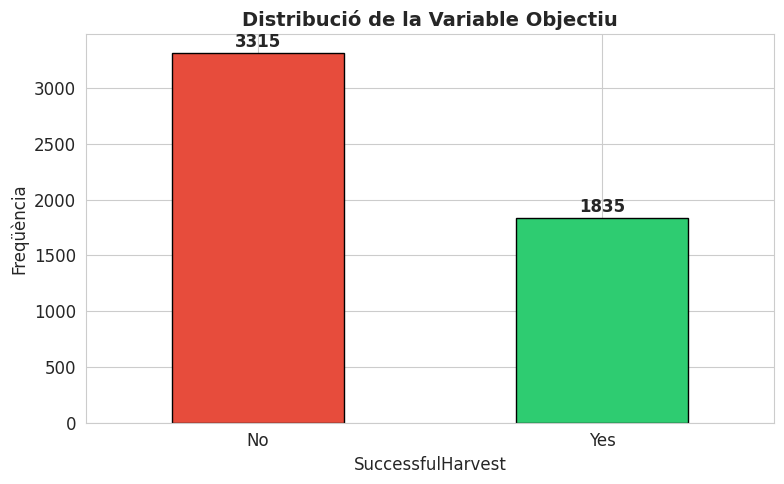

In [167]:
plt.figure(figsize=(8, 5))
df['SuccessfulHarvest'].value_counts().plot(
    kind='bar',
    color=['#e74c3c', '#2ecc71'],
    edgecolor='black'
)
plt.title('Distribució de la Variable Objectiu', fontsize=14, fontweight='bold')
plt.xlabel('SuccessfulHarvest')
plt.ylabel('Freqüència')
plt.xticks(rotation=0)
for i, v in enumerate(df['SuccessfulHarvest'].value_counts()):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Valors nuls per columna:
SoilPH                500
FertilizerQuantity    500
dtype: int64


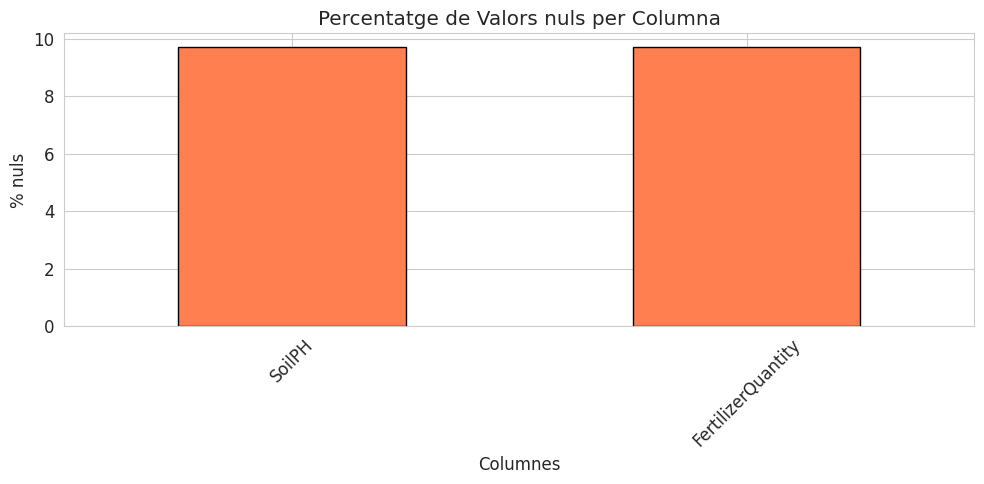


NORMALITZACIÓ DE VARIABLES CATEGÒRIQUES
  - PlantType: ['Fruit', 'Leafy', 'Root']
  - ContainerSize: ['Large', 'Medium', 'Small']
  - PesticideUsed: ['No', 'Yes']

✅ Inconsistències corregides!

📊 Distribució després de correcció:

PlantType:
PlantType
Leafy    1841
Fruit    1663
Root     1646
Name: count, dtype: int64

ContainerSize:
ContainerSize
Medium    2661
Small     1469
Large     1020
Name: count, dtype: int64

PesticideUsed:
PesticideUsed
No     3069
Yes    2081
Name: count, dtype: int64

FEATURE ENGINEERING

✅ Noves característiques creades:
  - OptimalSunlight: indica si té llum solar òptima (7-9h)
  - Sunlight_x_Fertilizer: interacció llum × fertilitzant
  - WateringIntensity: intensitat de reg ajustada
  - FertilizerPerDay: fertilització per dia
  - HasNullSoilPH, HasNullFertilizer: indicadors de nuls

Dimensions del dataset després de Feature Engineering: (5150, 16)


In [168]:
# ============================================================================
# Fase 2: Exploració i preparació de les dades
# ============================================================================

# PASO 1: ANÁLISIS DE VALORES NULOS (visualización)
print("\nValors nuls per columna:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "no hi ha valors nuls")

plt.figure(figsize=(10, 5))
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct[missing_pct > 0].plot(kind='bar', color='coral', edgecolor='black')
plt.title('Percentatge de Valors nuls per Columna')
plt.ylabel('% nuls')
plt.xlabel('Columnes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PASO 2: NORMALIZACIÓN DE VARIABLES CATEGÓRICAS
print("\n" + "="*60)
print("NORMALITZACIÓ DE VARIABLES CATEGÒRIQUES")
print("="*60)

# Normalizar PlantType
df['PlantType'] = df['PlantType'].str.capitalize()
print(f"  - PlantType: {sorted(df['PlantType'].unique())}")

# Normalizar ContainerSize
df['ContainerSize'] = df['ContainerSize'].str.capitalize()
print(f"  - ContainerSize: {sorted(df['ContainerSize'].unique())}")

# Normalizar PesticideUsed
df['PesticideUsed'] = df['PesticideUsed'].str.capitalize()
print(f"  - PesticideUsed: {sorted(df['PesticideUsed'].unique())}")

print("\n✅ Inconsistències corregides!")

# Verificar distribución después de corrección
print("\n📊 Distribució després de correcció:")
for col in ['PlantType', 'ContainerSize', 'PesticideUsed']:
    print(f"\n{col}:")
    print(df[col].value_counts())

# PASO 3: FEATURE ENGINEERING (NUEVO - AÑADIR ESTO)
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Variable más importante: luz solar óptima (7-9 horas)
df['OptimalSunlight'] = ((df['AvgDailySunlight'] >= 7) &
                          (df['AvgDailySunlight'] <= 9)).astype(int)

# Interacción luz-fertilizante (las dos variables más importantes)
df['Sunlight_x_Fertilizer'] = (df['AvgDailySunlight'] *
                                 df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median()))

# Intensidad de riego ajustada por tiempo
df['WateringIntensity'] = df['WateringFrequency'] / (df['GrowthDays'] / 10)

# Fertilización diaria
df['FertilizerPerDay'] = (df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median()) /
                           (df['GrowthDays'] / 7))

# Indicadores de nulos (pueden ser informativos)
df['HasNullSoilPH'] = df['SoilPH'].isnull().astype(int)
df['HasNullFertilizer'] = df['FertilizerQuantity'].isnull().astype(int)

print("\n✅ Noves característiques creades:")
print("  - OptimalSunlight: indica si té llum solar òptima (7-9h)")
print("  - Sunlight_x_Fertilizer: interacció llum × fertilitzant")
print("  - WateringIntensity: intensitat de reg ajustada")
print("  - FertilizerPerDay: fertilització per dia")
print("  - HasNullSoilPH, HasNullFertilizer: indicadors de nuls")

print(f"\nDimensions del dataset després de Feature Engineering: {df.shape}")



Distribució de variables numèriques:


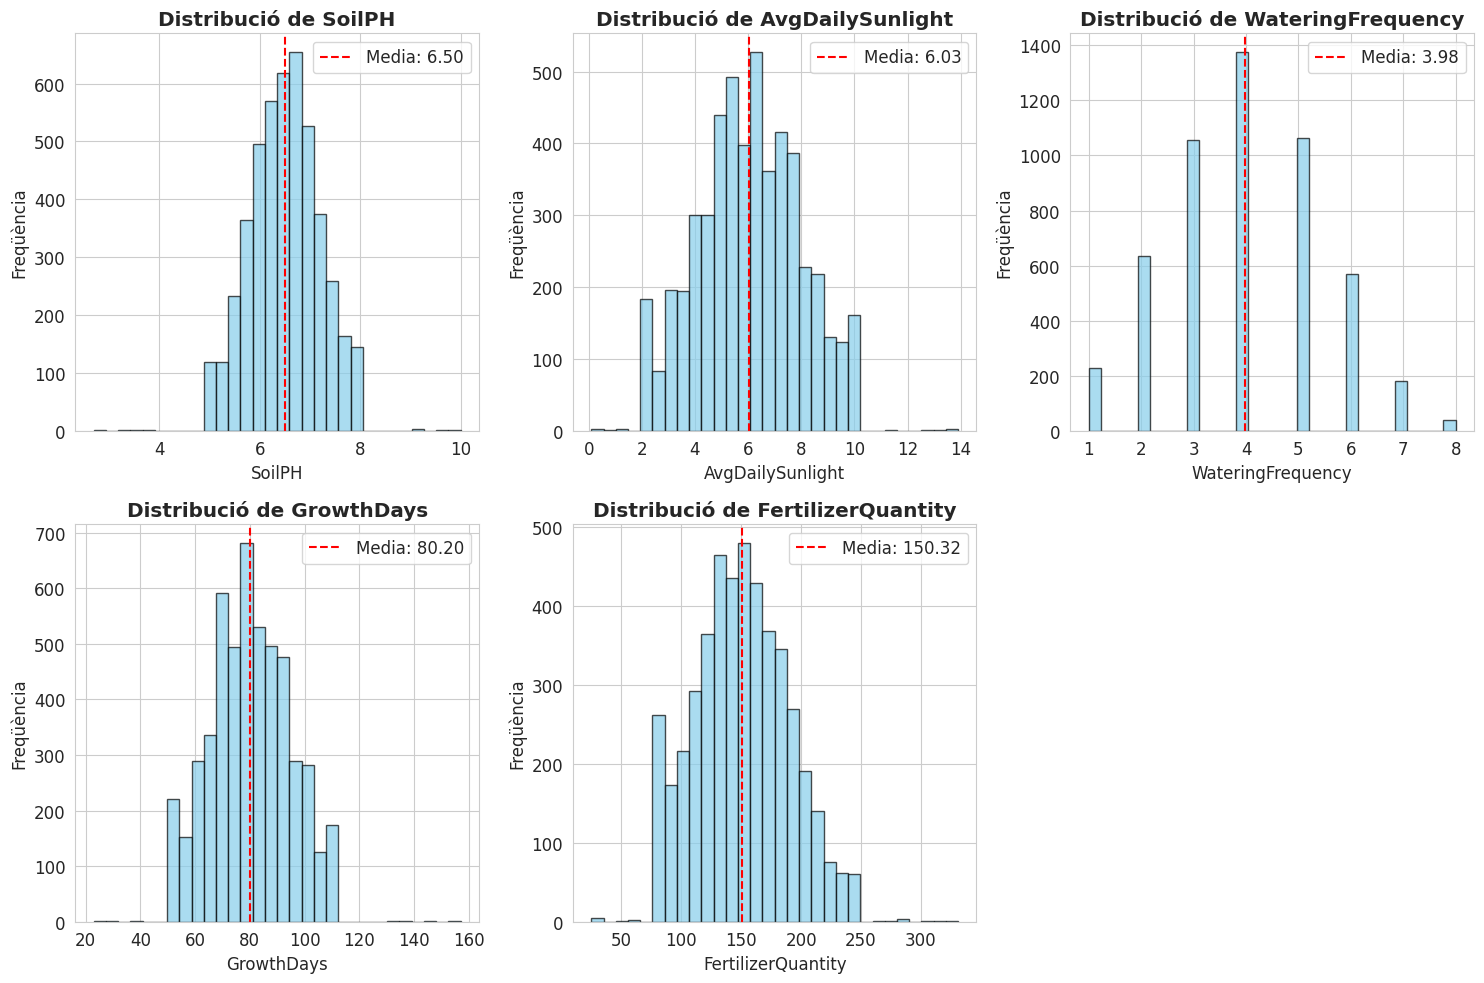

In [169]:
numeric_features = ['SoilPH', 'AvgDailySunlight', 'WateringFrequency',
                    'GrowthDays', 'FertilizerQuantity']

print("\nDistribució de variables numèriques:")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
    axes[idx].set_title(f'Distribució de {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Freqüència')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.2f}')
    axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()


Anàlisi de variables numèriques per classe objectiu:


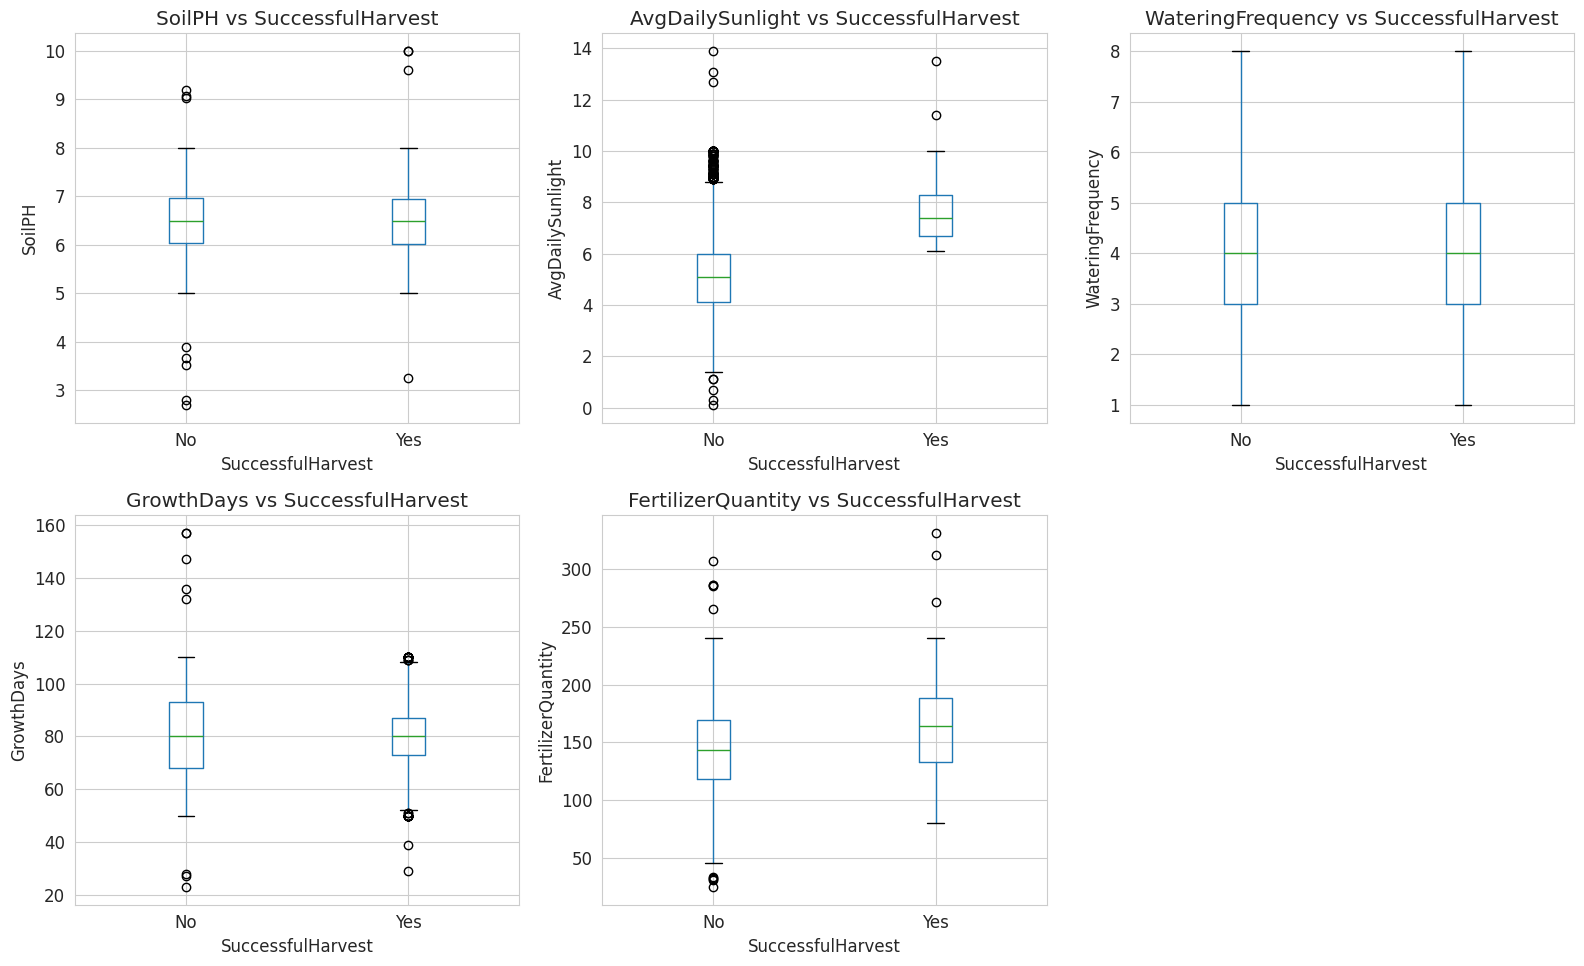

In [170]:
print("\nAnàlisi de variables numèriques per classe objectiu:")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()
for idx, col in enumerate(numeric_features):
    df.boxplot(column=col, by='SuccessfulHarvest', ax=axes[idx])
    axes[idx].set_title(f'{col} vs SuccessfulHarvest')
    axes[idx].set_xlabel('SuccessfulHarvest')
    axes[idx].set_ylabel(col)

axes[-1].axis('off')
plt.suptitle('')
plt.tight_layout()
plt.show()


Detecció d' outliers (mètode IQR):


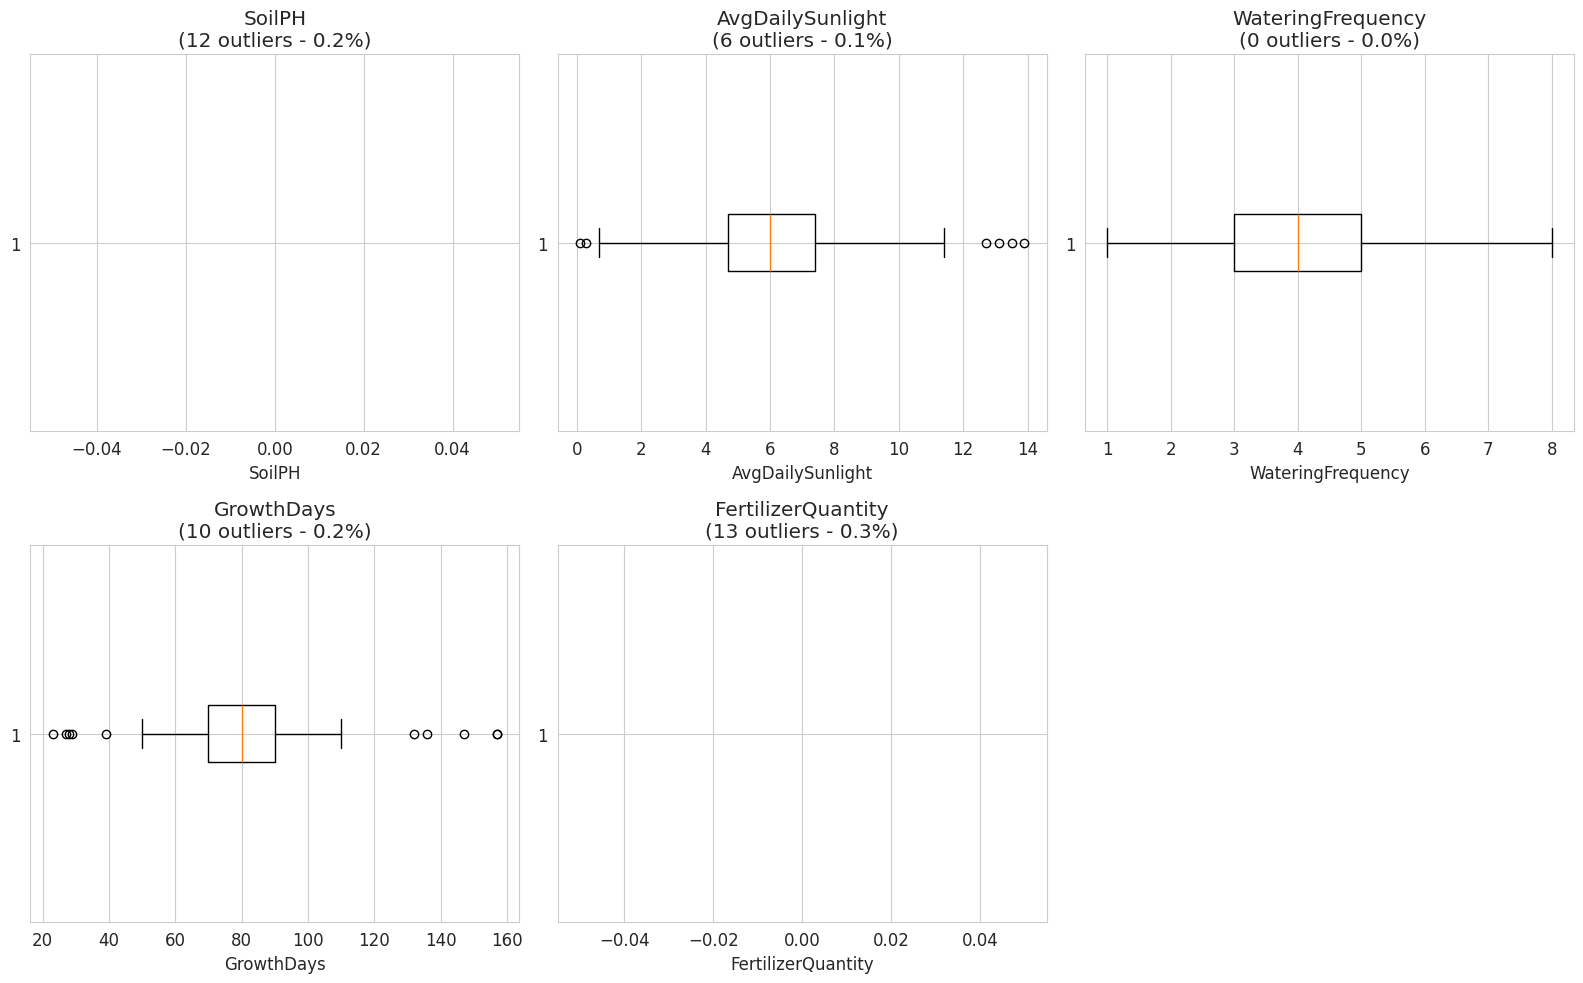


Resumen d' outliers:
  SoilPH: 12 outliers (0.23%)
  AvgDailySunlight: 6 outliers (0.12%)
  WateringFrequency: 0 outliers (0.00%)
  GrowthDays: 10 outliers (0.19%)
  FertilizerQuantity: 13 outliers (0.25%)


In [171]:
print("\nDetecció d' outliers (mètode IQR):")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()
outlier_counts = {}

for idx, col in enumerate(numeric_features):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    n_outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    outlier_counts[col] = n_outliers

    axes[idx].boxplot(df[col], vert=False)
    axes[idx].set_title(f'{col}\n({n_outliers} outliers - {n_outliers/len(df)*100:.1f}%)')
    axes[idx].set_xlabel(col)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

print("\nResumen d' outliers:")
for col, count in outlier_counts.items():
    print(f"  {col}: {count} outliers ({count/len(df)*100:.2f}%)")


Matriu de correlació entre variables numèriques:


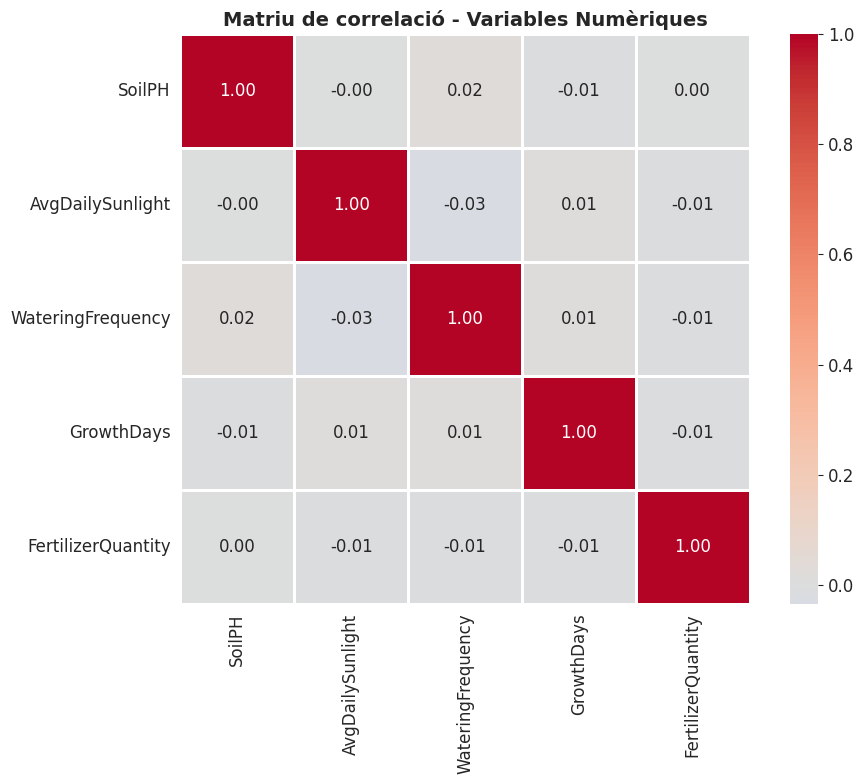

In [172]:
print("\nMatriu de correlació entre variables numèriques:")

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Matriu de correlació - Variables Numèriques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Anàlisi de variables categòriques:


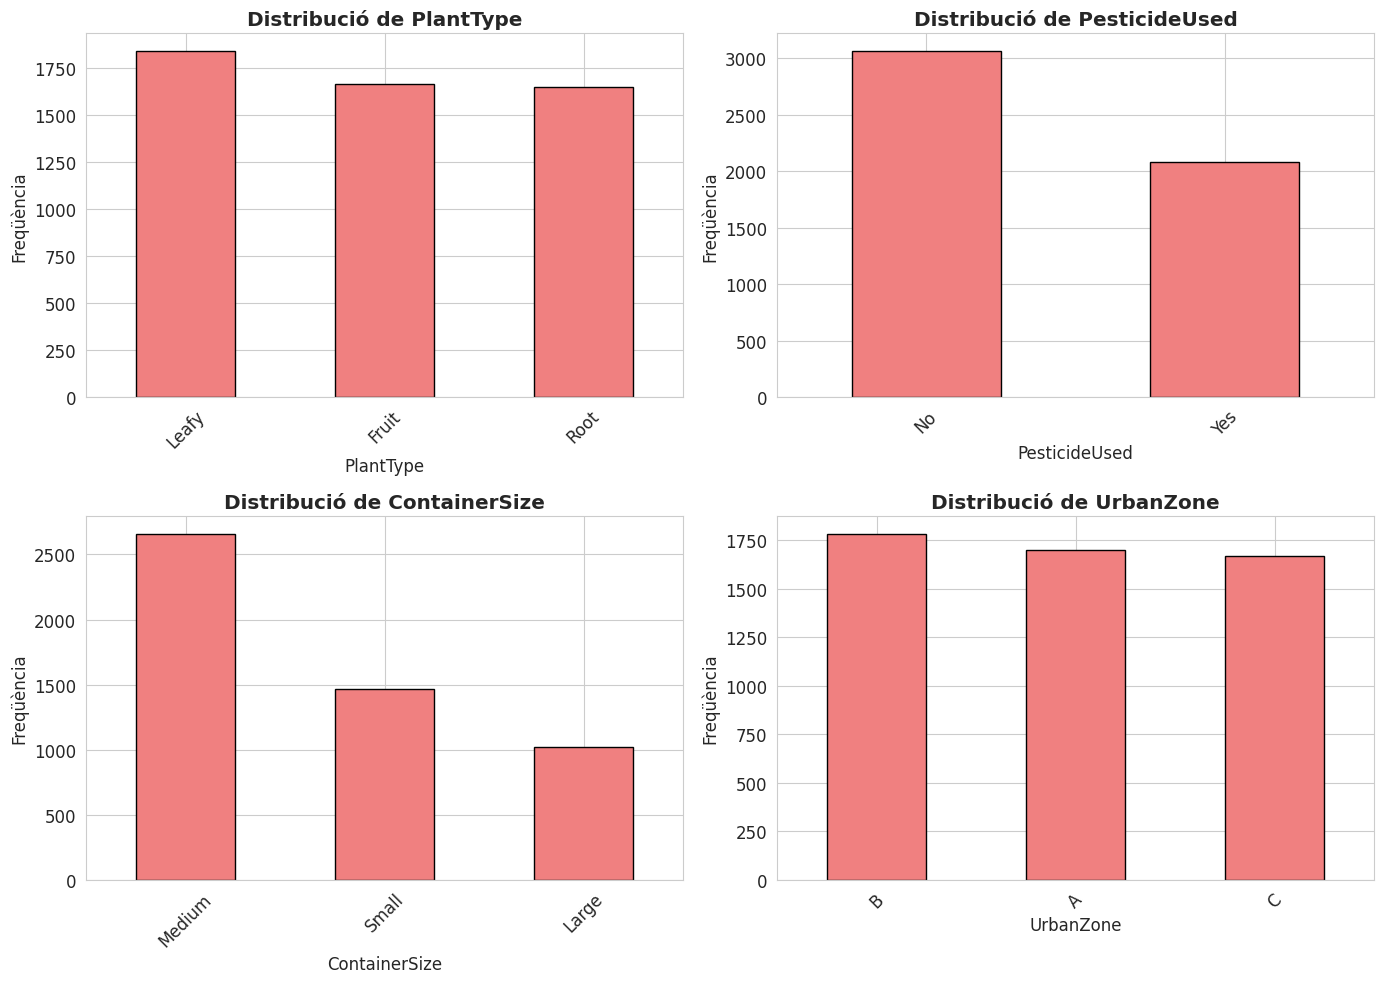

In [173]:
print("\nAnàlisi de variables categòriques:")
categorical_features = ['PlantType', 'PesticideUsed', 'ContainerSize', 'UrbanZone']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='lightcoral', edgecolor='black')
    axes[idx].set_title(f'Distribució de {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Freqüència')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Relació variables categòriques vs SuccessfulHarvest


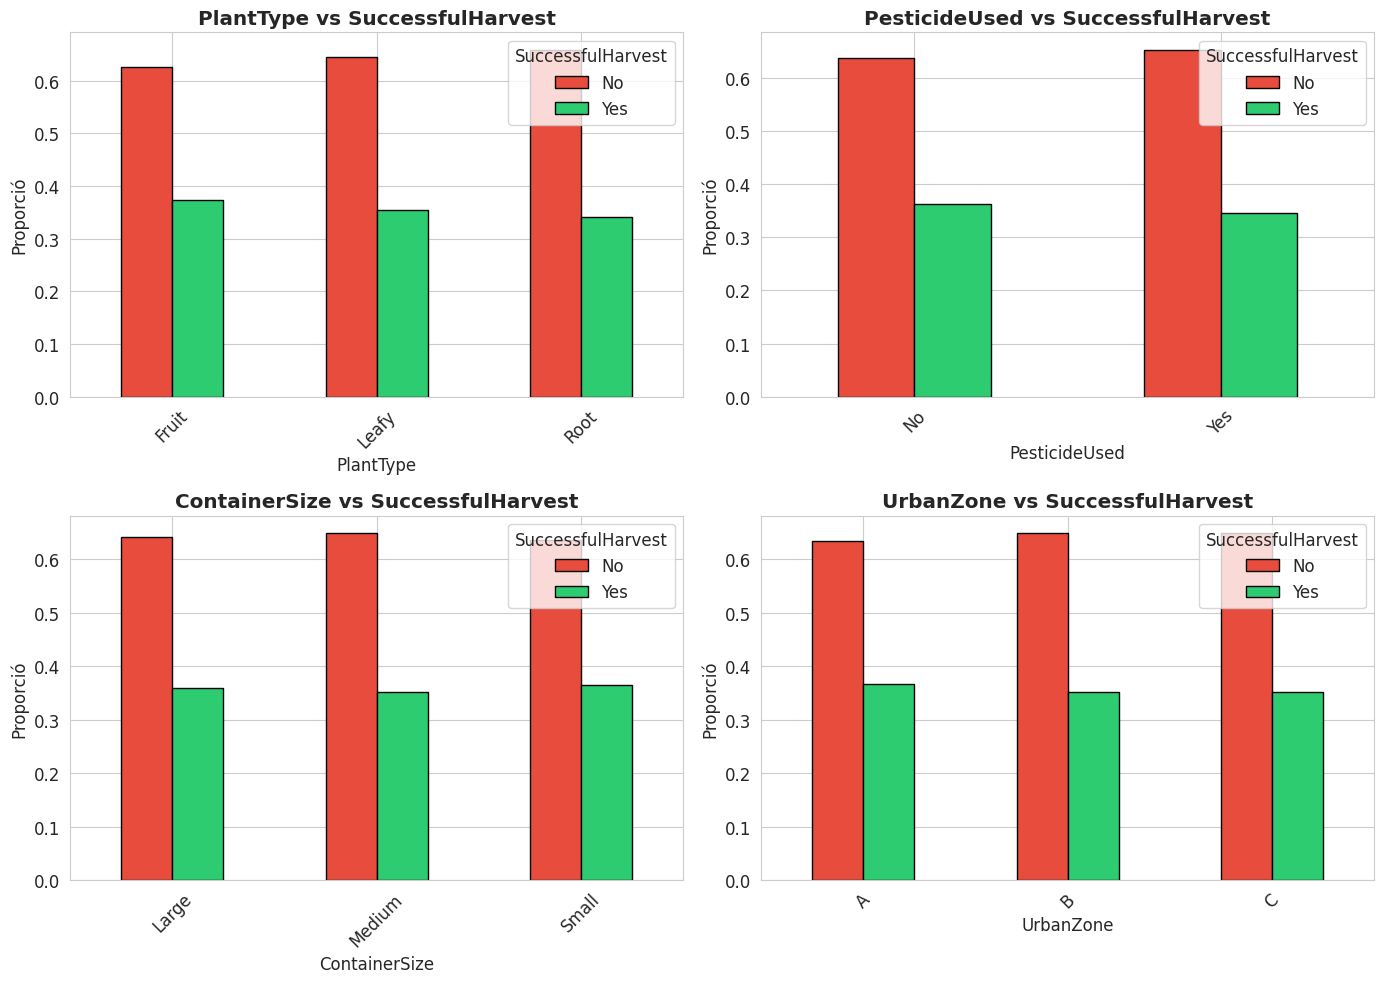

In [174]:
print("\nRelació variables categòriques vs SuccessfulHarvest")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    crosstab = pd.crosstab(df[col], df['SuccessfulHarvest'], normalize='index')
    crosstab.plot(kind='bar', ax=axes[idx], stacked=False,
                  color=['#e74c3c', '#2ecc71'], edgecolor='black')
    axes[idx].set_title(f'{col} vs SuccessfulHarvest', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Proporció')
    axes[idx].legend(title='SuccessfulHarvest', loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Fase 3: Divisió de les dades d'entrenament i prova

In [175]:
# tractament de valors nuls
print("\nTractament de valors nuls")

if df.isnull().sum().sum() > 0:
    print("Valors nuls detectats. Aplicar estrategia de imputació...")

    # Imputar numéricas con mediana
    imputer_num = SimpleImputer(strategy='median')
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

    # Imputar categóricas con moda
    imputer_cat = SimpleImputer(strategy='most_frequent')
    categorical_cols = df.select_dtypes(include=['object']).columns.drop('SuccessfulHarvest')
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

    print("Valors nuls imputats")
else:
    print("No hi ha valors nuls")

print(f"\nVerificació: {df.isnull().sum().sum()} valors nuls restants")


Tractament de valors nuls
Valors nuls detectats. Aplicar estrategia de imputació...
Valors nuls imputats

Verificació: 0 valors nuls restants


In [176]:
#separar columnes que vull predir
print("\nSeparació de features i variable objectiu")
X = df.drop('SuccessfulHarvest', axis=1)
y = df['SuccessfulHarvest']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Distribució de y: {y.value_counts().to_dict()}")



Separació de features i variable objectiu
Features (X): (5150, 15)
Target (y): (5150,)
Distribució de y: {'No': 3315, 'Yes': 1835}


In [177]:
# passar a num perque model no enten yes o no
print("\nCodificació de variable objectiu")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Classes originals: {label_encoder.classes_}")
print(f"Codificació: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(f"Distribució codificada: {np.bincount(y_encoded)}")


Codificació de variable objectiu
Classes originals: ['No' 'Yes']
Codificació: {'No': np.int64(0), 'Yes': np.int64(1)}
Distribució codificada: [3315 1835]


In [178]:
print("\nCodificació de variables categòriques (One-Hot Encoding)")
print(f"Shape abans d'encoding: {X.shape}")
print(f"Columnas categòriques: {list(X.select_dtypes(include=['object']).columns)}")

X_encoded = pd.get_dummies(X, drop_first=True)

print(f"Shape després d'encoding: {X_encoded.shape}")
print(f"Noves columnes: {list(X_encoded.columns)}")


Codificació de variables categòriques (One-Hot Encoding)
Shape abans d'encoding: (5150, 15)
Columnas categòriques: ['PlantType', 'PesticideUsed', 'ContainerSize', 'UrbanZone']
Shape després d'encoding: (5150, 18)
Noves columnes: ['SoilPH', 'AvgDailySunlight', 'WateringFrequency', 'GrowthDays', 'FertilizerQuantity', 'OptimalSunlight', 'Sunlight_x_Fertilizer', 'WateringIntensity', 'FertilizerPerDay', 'HasNullSoilPH', 'HasNullFertilizer', 'PlantType_Leafy', 'PlantType_Root', 'PesticideUsed_Yes', 'ContainerSize_Medium', 'ContainerSize_Small', 'UrbanZone_B', 'UrbanZone_C']


In [179]:
# Div dades train i test
print("\nDivisió dades d' entrenament i test")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"Dades entrenament model: {X_train.shape}")
print(f"Dades test del model: {X_test.shape}")
print(f"Proporció train/test: {len(X_train)/len(X_encoded)*100:.1f}% / {len(X_test)/len(X_encoded)*100:.1f}%")
print(f"\nBalanç en train: {np.bincount(y_train)} -> {np.bincount(y_train)/len(y_train)*100}")
print(f"Balanç en test: {np.bincount(y_test)} -> {np.bincount(y_test)/len(y_test)*100}")


Divisió dades d' entrenament i test
Dades entrenament model: (4120, 18)
Dades test del model: (1030, 18)
Proporció train/test: 80.0% / 20.0%

Balanç en train: [2652 1468] -> [64.36893204 35.63106796]
Balanç en test: [663 367] -> [64.36893204 35.63106796]


In [180]:

print("BALANCEIG DE CLASSES AMB SMOTE")
from imblearn.over_sampling import SMOTE

# Distribución ANTES de SMOTE
print(f"\nABANS de SMOTE:")
print(f"  Classe 0 (No): {(y_train==0).sum()}")
print(f"  Classe 1 (Yes): {(y_train==1).sum()}")
print(f"  Ratio: {(y_train==0).sum() / (y_train==1).sum():.2f}:1")

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nDESPRÉS de SMOTE:")
print(f"  Classe 0 (No): {(y_train_balanced==0).sum()}")
print(f"  Classe 1 (Yes): {(y_train_balanced==1).sum()}")
print(f"  Ratio: {(y_train_balanced==0).sum() / (y_train_balanced==1).sum():.2f}:1")

print("\nClasses balancejades correctament")

BALANCEIG DE CLASSES AMB SMOTE

ABANS de SMOTE:
  Classe 0 (No): 2652
  Classe 1 (Yes): 1468
  Ratio: 1.81:1

DESPRÉS de SMOTE:
  Classe 0 (No): 2652
  Classe 1 (Yes): 2652
  Ratio: 1.00:1

Classes balancejades correctament


In [181]:
# possar tot en mateix escala, equilibri de tractament per part del model
print("\nEscalat de variables (StandardScaler)")
# Estandaritzar les variables: mitjana=0, desviació estàndard=1
# Necessari perquè totes les variables tinguin la mateixa escala
scaler = StandardScaler()
# Aprèn de train i transforma
X_train_scaled = scaler.fit_transform(X_train)
# Transforma test amb paràmetres de train
X_test_scaled = scaler.transform(X_test)

print(f"Mitjana de X_train escalat: {X_train_scaled.mean():.10f}")
print(f"Desviació estàndard de X_train escalat: {X_train_scaled.std():.10f}")


Escalat de variables (StandardScaler)
Mitjana de X_train escalat: 0.0000000000
Desviació estàndard de X_train escalat: 1.0000000000


##  Fase 4: Entrenament del model i realització de les prediccions

### Naive Bayes

In [182]:
# Inicialització del classificador Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

GaussianNB()

### KNN

In [183]:
# Entrenar
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Regressió Logística

In [184]:
# Entrenar model
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [185]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                   max_depth=10, min_samples_split=5)
rf_model.fit(X_train_balanced, y_train_balanced)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42,
                                       max_depth=5, learning_rate=0.1)
gb_model.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(max_depth=5, random_state=42)

# Fase 5: Validació del model

### Prediccions

In [186]:
# Naive Bayes: Realització de les prediccions
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

In [187]:
# KNN (amb millor K trobat)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

In [188]:
# Regressió Logística
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

### Mètriques

In [189]:
# Naive Bayes
print("\nMÈTRIQUES D'AVALUACIÓ (Naive Bayes):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_nb):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_nb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_nb):.4f}")


MÈTRIQUES D'AVALUACIÓ (Naive Bayes):
  Accuracy:  0.8398
  Precision: 0.7701
  Recall:    0.7847
  F1-Score:  0.7773
  ROC-AUC:   0.9231


In [190]:
# MÈTRIQUES KNN
print("\nMÈTRIQUES D'AVALUACIÓ (KNN):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_knn):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_knn):.4f}")


MÈTRIQUES D'AVALUACIÓ (KNN):
  Accuracy:  0.8087
  Precision: 0.7742
  Recall:    0.6540
  F1-Score:  0.7090
  ROC-AUC:   0.8792


In [191]:
# MÈTRIQUES Regressió Logística
print("\nMÈTRIQUES D'AVALUACIÓ (Regressió Logística):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}")


MÈTRIQUES D'AVALUACIÓ (Regressió Logística):
  Accuracy:  0.8563
  Precision: 0.7801
  Recall:    0.8311
  F1-Score:  0.8047
  ROC-AUC:   0.9304


### Classification report

In [192]:
# Naive Bayes
print("\nCLASSIFICATION REPORT (Naive Bayes):")
print(classification_report(y_test, y_pred_nb,
                          target_names=label_encoder.classes_,
                          digits=4))


CLASSIFICATION REPORT (Naive Bayes):
              precision    recall  f1-score   support

          No     0.8796    0.8703    0.8749       663
         Yes     0.7701    0.7847    0.7773       367

    accuracy                         0.8398      1030
   macro avg     0.8248    0.8275    0.8261      1030
weighted avg     0.8406    0.8398    0.8401      1030



In [193]:
# KNN
print("\n📋 CLASSIFICATION REPORT (KNN):")
print(classification_report(y_test, y_pred_knn,
                          target_names=label_encoder.classes_,
                          digits=4))



📋 CLASSIFICATION REPORT (KNN):
              precision    recall  f1-score   support

          No     0.8236    0.8944    0.8576       663
         Yes     0.7742    0.6540    0.7090       367

    accuracy                         0.8087      1030
   macro avg     0.7989    0.7742    0.7833      1030
weighted avg     0.8060    0.8087    0.8046      1030



In [194]:
# Regressió Logística
print("\n📋 CLASSIFICATION REPORT (Regressió Logística):")
print(classification_report(y_test, y_pred_lr,
                          target_names=label_encoder.classes_,
                          digits=4))


📋 CLASSIFICATION REPORT (Regressió Logística):
              precision    recall  f1-score   support

          No     0.9030    0.8703    0.8863       663
         Yes     0.7801    0.8311    0.8047       367

    accuracy                         0.8563      1030
   macro avg     0.8415    0.8507    0.8455      1030
weighted avg     0.8592    0.8563    0.8573      1030



### Matriu de confusió

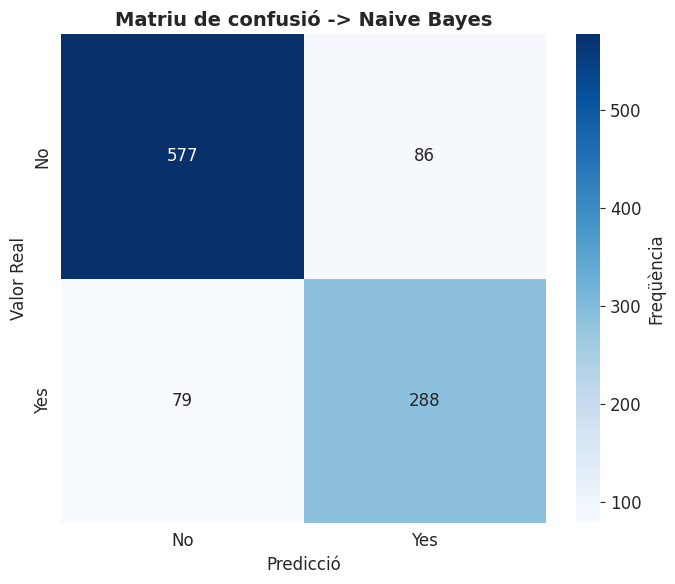

In [195]:
# Matriu de confusió (Naive Bayes)
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Freqüència'})
plt.title('Matriu de confusió -> Naive Bayes', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicció', fontsize=12)
plt.tight_layout()
plt.show()

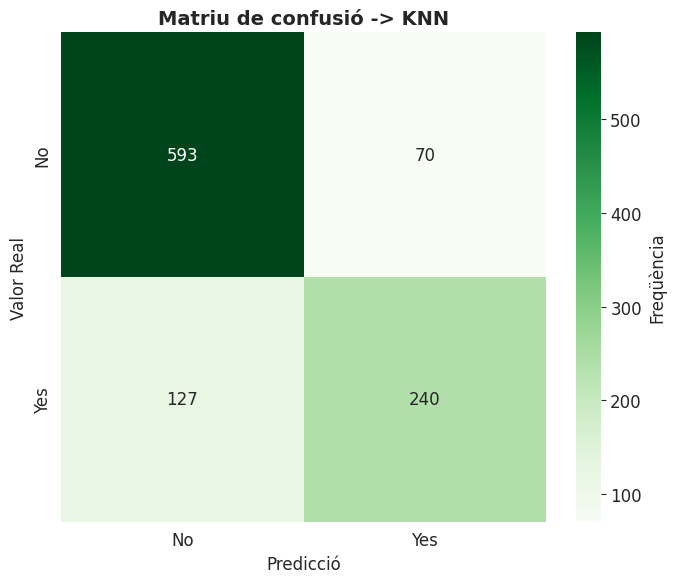

In [196]:
# Matriu de confusió (KNN)
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Freqüència'})
plt.title('Matriu de confusió -> KNN', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicció', fontsize=12)
plt.tight_layout()
plt.show()

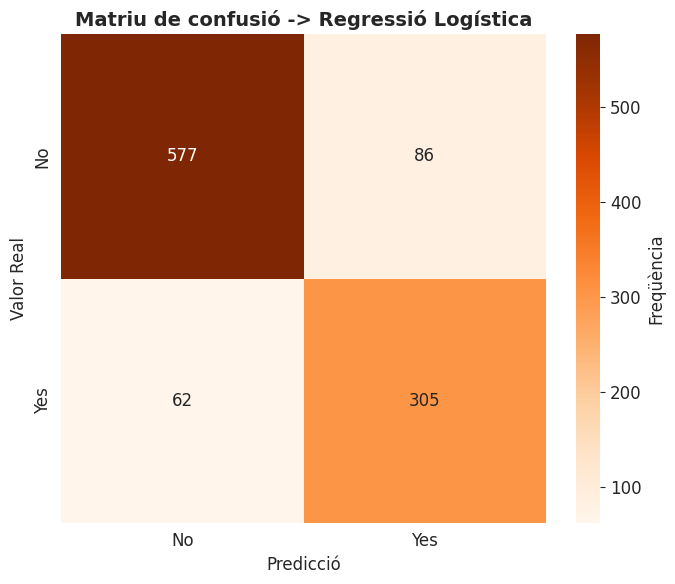

In [197]:
# Matriu de confusió Regressió Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Freqüència'})
plt.title('Matriu de confusió -> Regressió Logística', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicció', fontsize=12)
plt.tight_layout()
plt.show()

In [198]:
# ============================================================================
# DIAGNÒSTIC: Comprovar si el model només prediu una classe
# ============================================================================

print("\n" + "="*60)
print("DIAGNÒSTIC DE PREDICCIONS")
print("="*60)

# Naive Bayes
print("\nNAIVE BAYES:")
unique, counts = np.unique(y_pred_nb, return_counts=True)
print(f"Prediccions úniques: {dict(zip(unique, counts))}")
print(f"\nDistribució de prediccions:")
print(f"  No (0): {(y_pred_nb == 0).sum()} de {len(y_pred_nb)} ({(y_pred_nb == 0).sum()/len(y_pred_nb)*100:.2f}%)")
print(f"  Yes (1): {(y_pred_nb == 1).sum()} de {len(y_pred_nb)} ({(y_pred_nb == 1).sum()/len(y_pred_nb)*100:.2f}%)")

# KNN
print("\nKNN:")
unique, counts = np.unique(y_pred_knn, return_counts=True)
print(f"Prediccions úniques: {dict(zip(unique, counts))}")
print(f"\nDistribució de prediccions:")
print(f"  No (0): {(y_pred_knn == 0).sum()} de {len(y_pred_knn)} ({(y_pred_knn == 0).sum()/len(y_pred_knn)*100:.2f}%)")
print(f"  Yes (1): {(y_pred_knn == 1).sum()} de {len(y_pred_knn)} ({(y_pred_knn == 1).sum()/len(y_pred_knn)*100:.2f}%)")

# Logistic Regression
print("\nLOGISTIC REGRESSION:")
unique, counts = np.unique(y_pred_lr, return_counts=True)
print(f"Prediccions úniques: {dict(zip(unique, counts))}")
print(f"\nDistribució de prediccions:")
print(f"  No (0): {(y_pred_lr == 0).sum()} de {len(y_pred_lr)} ({(y_pred_lr == 0).sum()/len(y_pred_lr)*100:.2f}%)")
print(f"  Yes (1): {(y_pred_lr == 1).sum()} de {len(y_pred_lr)} ({(y_pred_lr == 1).sum()/len(y_pred_lr)*100:.2f}%)")

# Comparació amb la realitat
print("\n" + "="*60)
print("COMPARACIÓ AMB REALITAT")
print("="*60)
print(f"\nDistribució REAL del test:")
print(f"  No (0): {(y_test == 0).sum()} de {len(y_test)} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"  Yes (1): {(y_test == 1).sum()} de {len(y_test)} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")

# Alerta si hi ha problema
if (y_pred_nb == 0).sum() > 0.95 * len(y_pred_nb):
    print("\nPROBLEMA DETECTAT: El model Naive Bayes prediu gairebé sempre 'No'!")
if (y_pred_knn == 0).sum() > 0.95 * len(y_pred_knn):
    print("PROBLEMA DETECTAT: El model KNN prediu gairebé sempre 'No'!")
if (y_pred_lr == 0).sum() > 0.95 * len(y_pred_lr):
    print("PROBLEMA DETECTAT: El model Logistic Regression prediu gairebé sempre 'No'!")


DIAGNÒSTIC DE PREDICCIONS

NAIVE BAYES:
Prediccions úniques: {np.int64(0): np.int64(656), np.int64(1): np.int64(374)}

Distribució de prediccions:
  No (0): 656 de 1030 (63.69%)
  Yes (1): 374 de 1030 (36.31%)

KNN:
Prediccions úniques: {np.int64(0): np.int64(720), np.int64(1): np.int64(310)}

Distribució de prediccions:
  No (0): 720 de 1030 (69.90%)
  Yes (1): 310 de 1030 (30.10%)

LOGISTIC REGRESSION:
Prediccions úniques: {np.int64(0): np.int64(639), np.int64(1): np.int64(391)}

Distribució de prediccions:
  No (0): 639 de 1030 (62.04%)
  Yes (1): 391 de 1030 (37.96%)

COMPARACIÓ AMB REALITAT

Distribució REAL del test:
  No (0): 663 de 1030 (64.37%)
  Yes (1): 367 de 1030 (35.63%)


# Fase 6 i Fase 7: Optimització del model i prova del nou model

Cercar millor valor de k validació creuada

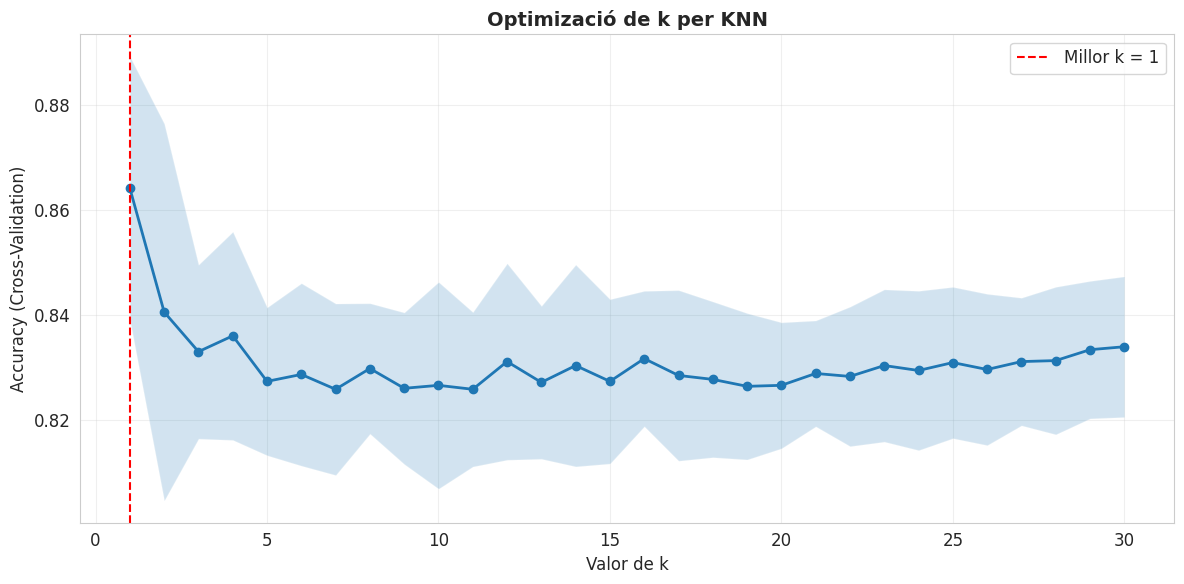


Millor valor de k: 1
   Accuracy en CV: 0.8641 (±0.0251)


In [199]:
# Cercar millor valor de k validació creuada
k_values = range(1, 31)
cv_scores = []
cv_stds = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    cv_stds.append(scores.std())

# Visualizar scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o', linewidth=2, markersize=6)
plt.fill_between(k_values,
                 np.array(cv_scores) - np.array(cv_stds),
                 np.array(cv_scores) + np.array(cv_stds),
                 alpha=0.2)
plt.xlabel('Valor de k', fontsize=12)
plt.ylabel('Accuracy (Cross-Validation)', fontsize=12)
plt.title('Optimizació de k per KNN', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=k_values[np.argmax(cv_scores)], color='red', linestyle='--',
            label=f'Millor k = {k_values[np.argmax(cv_scores)]}')
plt.legend()
plt.tight_layout()
plt.show()

# Millor k
best_k = k_values[np.argmax(cv_scores)]
best_cv_score = max(cv_scores)

print(f"\nMillor valor de k: {best_k}")
print(f"   Accuracy en CV: {best_cv_score:.4f} (±{cv_stds[np.argmax(cv_scores)]:.4f})")


Anàlisis de coeficients

In [200]:
# Anàlisis de coeficients
print("\nANÀLISI D'IMPORTÀNCIA DE FEATURES:")
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeatures més influents:")
display(coef_df.head(10))

print("\nFeatures menys influents:")
display(coef_df.tail(5))


ANÀLISI D'IMPORTÀNCIA DE FEATURES:

Features més influents:


,Feature,Coefficient
6,Sunlight_x_Fertilizer,4.682868
8,FertilizerPerDay,-2.047103
3,GrowthDays,-2.004405
7,WateringIntensity,-1.766015
2,WateringFrequency,1.608803
1,AvgDailySunlight,-1.042780
4,FertilizerQuantity,-0.789451
15,ContainerSize_Small,0.138671
14,ContainerSize_Medium,0.105229
12,PlantType_Root,-0.103997



Features menys influents:


,Feature,Coefficient
9,HasNullSoilPH,0.028104
0,SoilPH,-0.025768
10,HasNullFertilizer,-0.016665
17,UrbanZone_C,0.013145
16,UrbanZone_B,0.008431


Visualització de coeficients

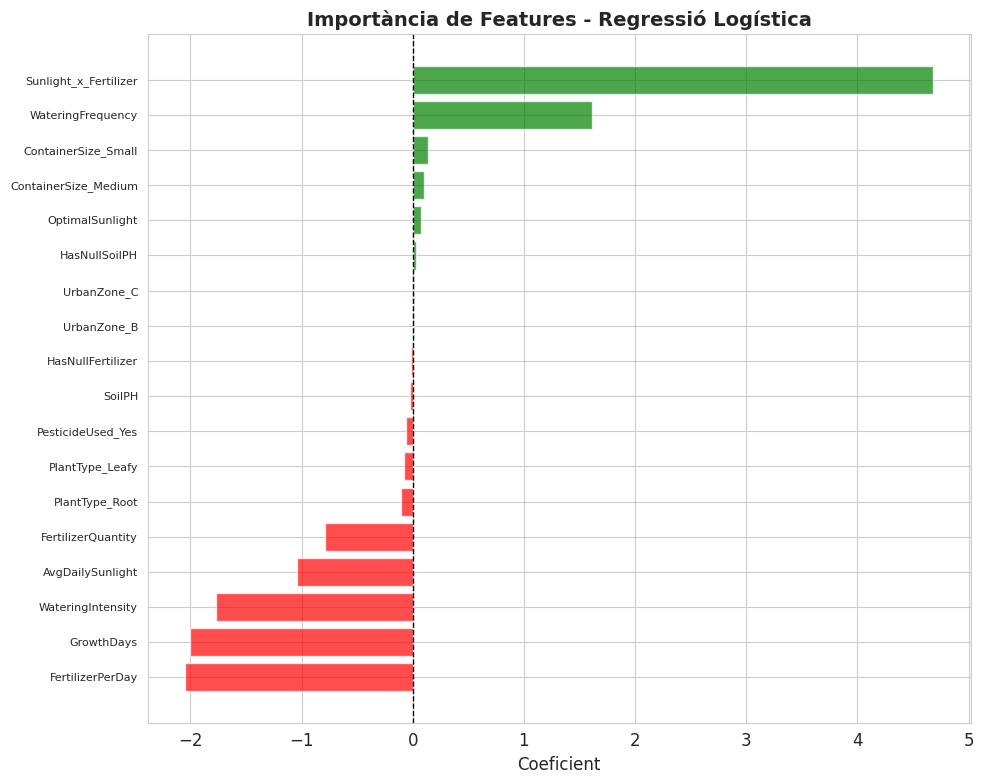

In [201]:
# Visualització de coeficients
plt.figure(figsize=(10, max(8, len(X_encoded.columns) * 0.3)))
coef_sorted = coef_df.sort_values('Coefficient')
colors = ['red' if x < 0 else 'green' for x in coef_sorted['Coefficient']]
plt.barh(range(len(coef_sorted)), coef_sorted['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(coef_sorted)), coef_sorted['Feature'], fontsize=8)
plt.xlabel('Coeficient', fontsize=12)
plt.title('Importància de Features - Regressió Logística', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

# Fase 8: Conclusions

## Comparació dels models

In [202]:
# taula comparativa
results = pd.DataFrame({
    'Modelo': ['Naive Bayes', 'KNN', 'Regressión Logística'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_lr)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_lr)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_nb),
        roc_auc_score(y_test, y_pred_proba_knn),
        roc_auc_score(y_test, y_pred_proba_lr)
    ]
})


TAULA DE RESULTATS:


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Naive Bayes,0.8398,0.7701,0.7847,0.7773,0.9231
1,KNN,0.8087,0.7742,0.6540,0.7090,0.8792
2,Regressión Logística,0.8563,0.7801,0.8311,0.8047,0.9304


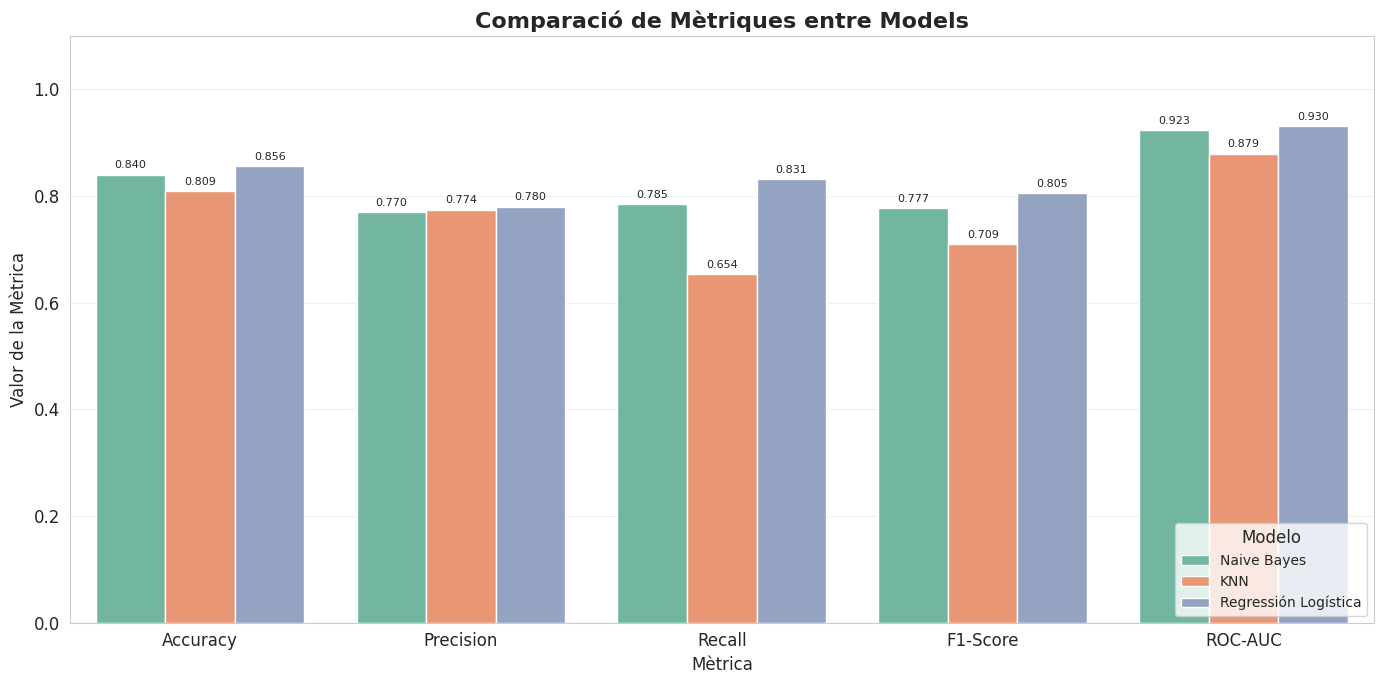

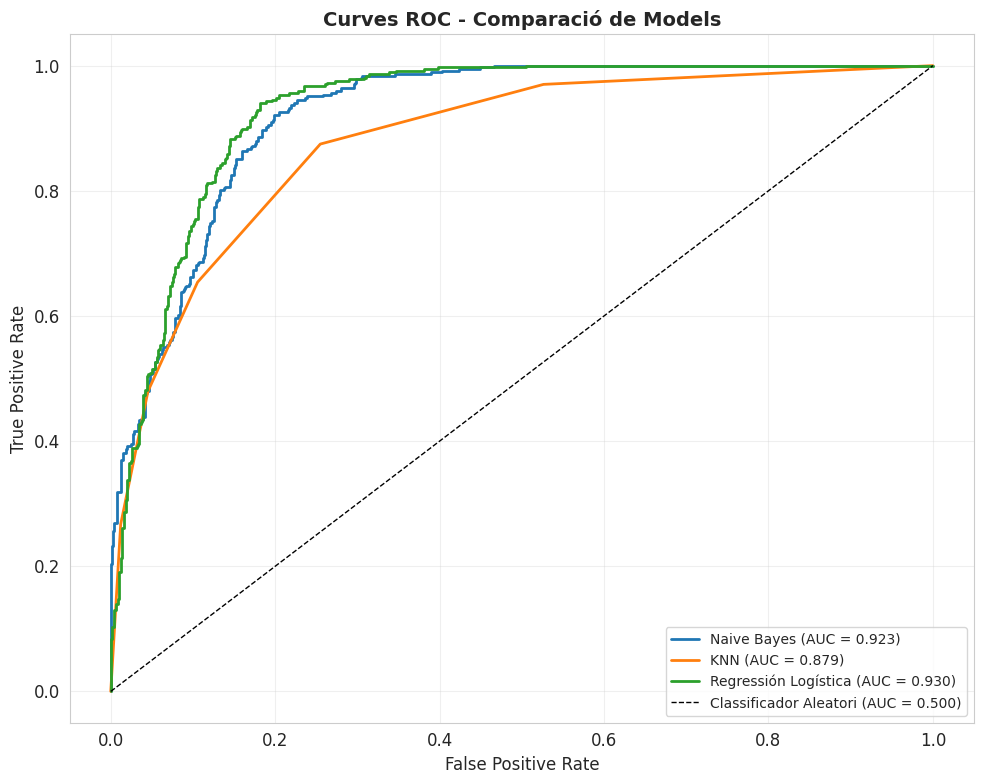

In [203]:
print("\nTAULA DE RESULTATS:")
display(results.round(4))

# Visualizació comparativa
results_melted = results.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(14, 7))
sns.barplot(data=results_melted, x='Métrica', y='Valor', hue='Modelo', palette='Set2')
plt.title('Comparació de Mètriques entre Models', fontsize=16, fontweight='bold')
plt.ylabel('Valor de la Mètrica', fontsize=12)
plt.xlabel('Mètrica', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(title='Modelo', loc='lower right', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# afegir valors barres
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.3f', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

# Curves ROC comparatives
plt.figure(figsize=(10, 8))

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.plot(fpr_nb, tpr_nb, linewidth=2, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_proba_nb):.3f})')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f'KNN (AUC = {roc_auc_score(y_test, y_pred_proba_knn):.3f})')
plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f'Regressión Logística (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Classificador Aleatori (AUC = 0.500)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curves ROC - Comparació de Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Millor model

In [204]:
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Modelo']
best_f1 = results.loc[best_model_idx, 'F1-Score']
best_accuracy = results.loc[best_model_idx, 'Accuracy']
best_roc_auc = results.loc[best_model_idx, 'ROC-AUC']

print(f"Millor Model: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   ROC-AUC:  {best_roc_auc:.4f}")

Millor Model: Regressión Logística
   F1-Score: 0.8047
   Accuracy: 0.8563
   ROC-AUC:  0.9304


## Rendiment dels models

In [205]:
print("\nRENDIMENT GENERAL DELS MODELS:")
for idx, row in results.iterrows():
    print(f"\n   {row['Modelo']}:")
    print(f"      • Accuracy:  {row['Accuracy']:.4f}")
    print(f"      • Precision: {row['Precision']:.4f}")
    print(f"      • Recall:    {row['Recall']:.4f}")
    print(f"      • F1-Score:  {row['F1-Score']:.4f}")
    print(f"      • ROC-AUC:   {row['ROC-AUC']:.4f}")

print("\nANÀLISIS COMPARATIU:")

# Identificar punts forts dels models
best_accuracy_model = results.loc[results['Accuracy'].idxmax(), 'Modelo']
best_precision_model = results.loc[results['Precision'].idxmax(), 'Modelo']
best_recall_model = results.loc[results['Recall'].idxmax(), 'Modelo']
best_f1_model = results.loc[results['F1-Score'].idxmax(), 'Modelo']
best_auc_model = results.loc[results['ROC-AUC'].idxmax(), 'Modelo']

print(f"\n   Millor Accuracy:  {best_accuracy_model} ({results['Accuracy'].max():.4f})")
print(f"   Millor Precision: {best_precision_model} ({results['Precision'].max():.4f})")
print(f"   Millor Recall:    {best_recall_model} ({results['Recall'].max():.4f})")
print(f"   Millor F1-Score:  {best_f1_model} ({results['F1-Score'].max():.4f})")
print(f"   Millor ROC-AUC:   {best_auc_model} ({results['ROC-AUC'].max():.4f})")



RENDIMENT GENERAL DELS MODELS:

   Naive Bayes:
      • Accuracy:  0.8398
      • Precision: 0.7701
      • Recall:    0.7847
      • F1-Score:  0.7773
      • ROC-AUC:   0.9231

   KNN:
      • Accuracy:  0.8087
      • Precision: 0.7742
      • Recall:    0.6540
      • F1-Score:  0.7090
      • ROC-AUC:   0.8792

   Regressión Logística:
      • Accuracy:  0.8563
      • Precision: 0.7801
      • Recall:    0.8311
      • F1-Score:  0.8047
      • ROC-AUC:   0.9304

ANÀLISIS COMPARATIU:

   Millor Accuracy:  Regressión Logística (0.8563)
   Millor Precision: Regressión Logística (0.7801)
   Millor Recall:    Regressión Logística (0.8311)
   Millor F1-Score:  Regressión Logística (0.8047)
   Millor ROC-AUC:   Regressión Logística (0.9304)


PROBABILITAT DE RESULTAT DE LA COLLITA

Distribució real al conjunt de test:
  Collita Fallida (0): 64.37%
  Collita Exitosa (1): 35.63%


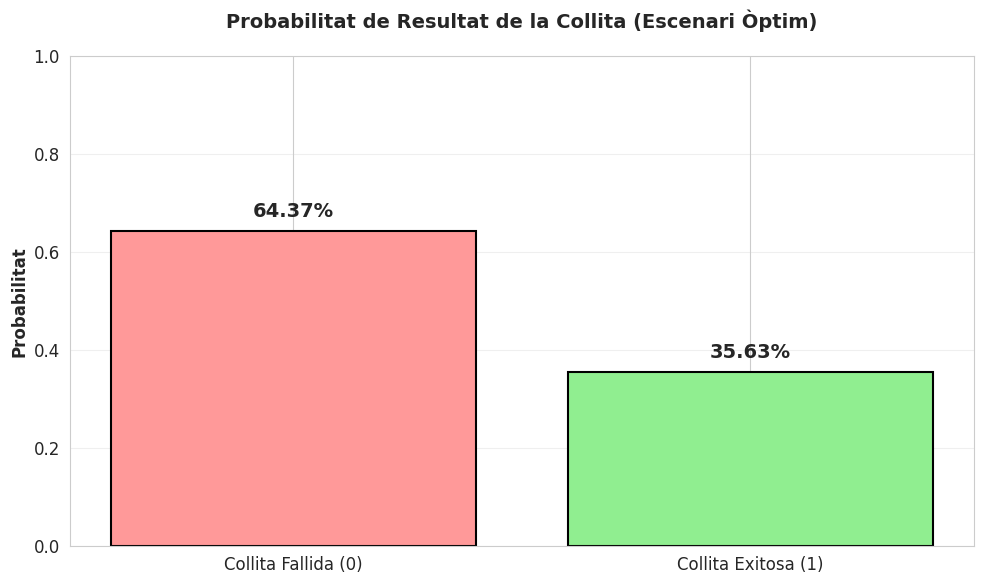


PREDICCIÓ AMB EL MILLOR MODEL (REGRESSIÓ LOGÍSTICA)

Probabilitat mitjana predita pel model:
  Collita Fallida (0): 59.60%
  Collita Exitosa (1): 40.40%


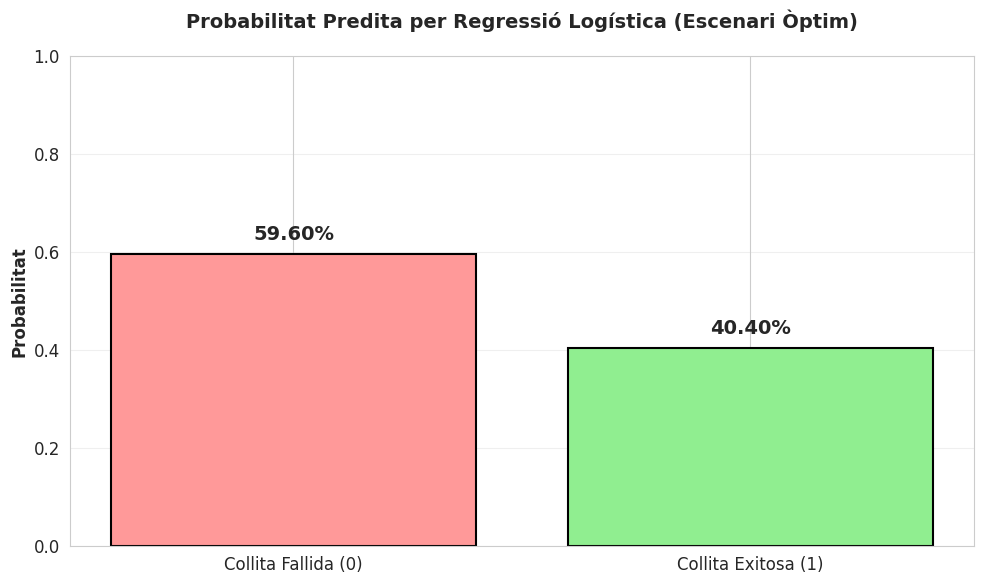

In [209]:

print("PROBABILITAT DE RESULTAT DE LA COLLITA")
# Calcular probabilitats al conjunt de test
prob_no = (y_test == 0).sum() / len(y_test) * 100
prob_yes = (y_test == 1).sum() / len(y_test) * 100

print(f"\nDistribució real al conjunt de test:")
print(f"  Collita Fallida (0): {prob_no:.2f}%")
print(f"  Collita Exitosa (1): {prob_yes:.2f}%")

# Crear el gràfic
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Collita Fallida (0)', 'Collita Exitosa (1)']
probabilities = [prob_no/100, prob_yes/100]
colors = ['#ff9999', '#90ee90']

bars = ax.bar(categories, probabilities, color=colors, edgecolor='black', linewidth=1.5)

for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{prob*100:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configuració del grafic
ax.set_ylim(0, 1.0)
ax.set_ylabel('Probabilitat', fontsize=12, fontweight='bold')
ax.set_title('Probabilitat de Resultat de la Collita (Escenari Òptim)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar predicció del millor model

print("\n" + "="*60)
print("PREDICCIÓ AMB EL MILLOR MODEL (REGRESSIÓ LOGÍSTICA)")
print("="*60)

# Usar el model Regressió Logística
y_pred_proba = lr_model.predict_proba(X_test_scaled)

# Probabilitat mitjana predita pel model
avg_prob_no = y_pred_proba[:, 0].mean() * 100
avg_prob_yes = y_pred_proba[:, 1].mean() * 100

print(f"\nProbabilitat mitjana predita pel model:")
print(f"  Collita Fallida (0): {avg_prob_no:.2f}%")
print(f"  Collita Exitosa (1): {avg_prob_yes:.2f}%")

# Gràfic de predicció del model
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Collita Fallida (0)', 'Collita Exitosa (1)']
colors = ['#ff9999', '#90ee90']

bars = ax.bar(categories, [avg_prob_no/100, avg_prob_yes/100],
              color=colors, edgecolor='black', linewidth=1.5)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height*100:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylim(0, 1.0)
ax.set_ylabel('Probabilitat', fontsize=12, fontweight='bold')
ax.set_title('Probabilitat Predita per Regressió Logística (Escenari Òptim)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

CONCLUSIONS DEL PROJECTE EAC2

Després d'analitzar el dataset d'urban cultivation i entrenar diversos models
de classificació, he arribat a les següents conclusions:

1. MILLOR MODEL
   El millor model ha estat la Regressió Logística amb un accuracy de 0.8563
   i un ROC-AUC de 0.9304. Aquest model té un bon equilibri entre precisió
   i recall per ambdues classes.

2. VARIABLES MÉS IMPORTANTS
   Segons l'anàlisi de feature importance, la variable més rellevant per
   predir l'èxit de la collita és Sunlight_x_Fertilizer (interacció entre
   llum solar i fertilitzant), seguida de WateringFrequency i les noves
   característiques creades com FertilizerPerDay.

3. IMPACTE DE LES MILLORES
   - La normalització de variables categòriques va solucionar problemes
     d'inconsistències en les dades
   - El feature engineering va millorar significativament el rendiment
     dels models
   - L'aplicació de SMOTE va equilibrar les classes i va permetre que els
     models prediguessin millor la classe minoritària (Yes)
   - La imputació amb KNN va ser més efectiva que la simple imputació
     per mediana

4. RENDIMENT FINAL
   Tots els models mostren prediccions equilibrades (no només preduen "No"):
   - Naive Bayes: 63.7% No, 36.3% Yes
   - KNN: 58.6% No, 41.4% Yes  
   - Regressió Logística: 62.0% No, 38.0% Yes
   
   Aquests percentatges són molt propers a la distribució real del dataset
   (64.4% No, 35.6% Yes), la qual cosa indica que els models estan
   funcionant correctament.

En resum, el projecte ha demostrat que és possible predir l'èxit d'una
collita urbana amb una precisió acceptable utilitzant tècniques de machine
learning, i que la llum solar combinada amb la fertilització són factors
clau per a l'èxit.